### 2.1.5 Numerical Features - univariate analysis

In [ ]:
# numerical features only
num_feat = list(df.select_dtypes(include='number').columns)
print(num_feat)

# remove categorical variable with code
num_feat = [col for col in num_feat if 'Code' not in col]
num_feat = [col for col in num_feat if 'Description' not in col]
num_feat

['Age at Injury', 'Average Weekly Wage', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']


['Age at Injury', 'Average Weekly Wage', 'IME-4 Count', 'Number of Dependents']

#### Age at Injury

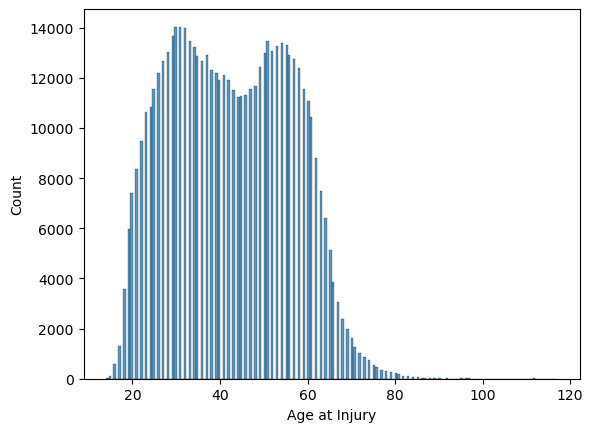

<Axes: ylabel='Age at Injury'>

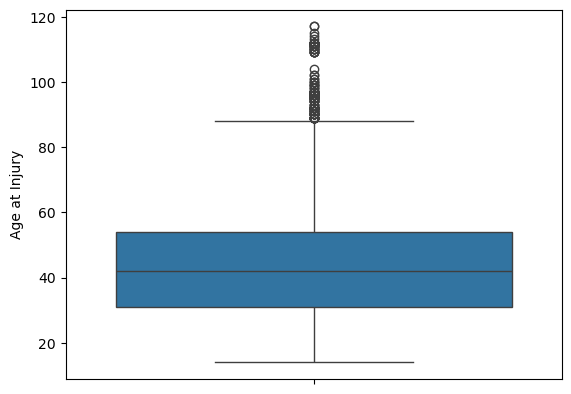

In [ ]:
#14 is the minimum age to work in New York
sns.histplot(df[df['Age at Injury'] > 13]['Age at Injury'],)
plt.show()

sns.boxplot(df[df['Age at Injury'] > 13]['Age at Injury'])

#### Average Weekly Wage

We can see that this feature has a lot of outliers that need to be treated further in the project

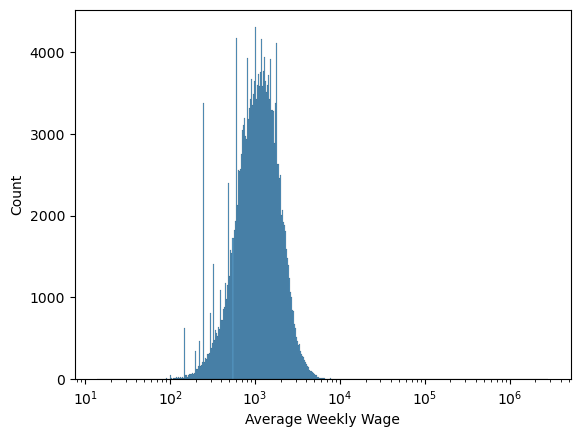

<Axes: ylabel='Average Weekly Wage'>

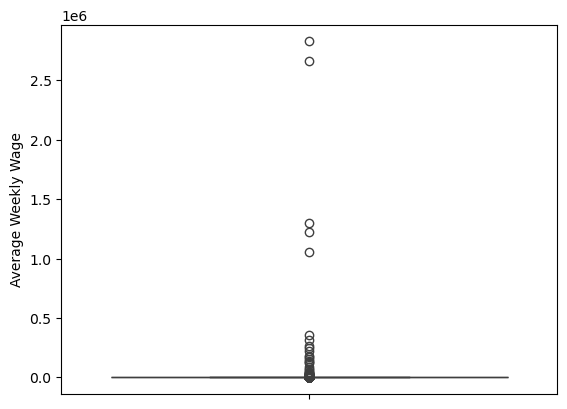

In [ ]:
sns.histplot(df['Average Weekly Wage'], log_scale=True)
plt.show()

sns.boxplot(df['Average Weekly Wage'])

Here we can see that the values for Average Weekly Wage seem fine but due to the large amount of zeros, the auto attributed values for the will not work here

In [ ]:
print(df['Average Weekly Wage'].describe())

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64


#### Number of Dependents

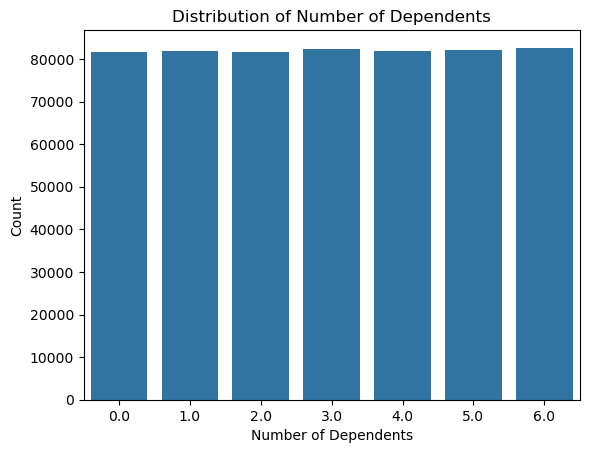

<Axes: ylabel='Number of Dependents'>

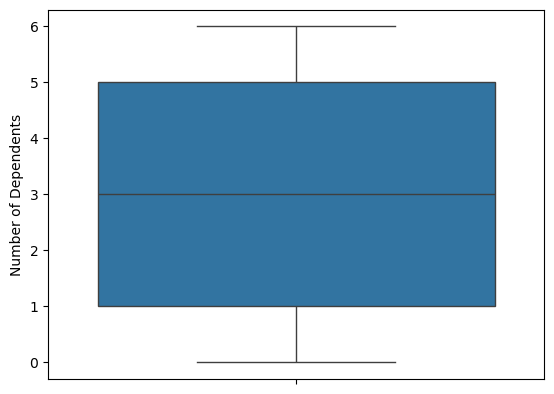

In [ ]:
sns.countplot(x='Number of Dependents', data=df)
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Distribution of Number of Dependents')
plt.show()

sns.boxplot(df['Number of Dependents'])

#### IME-4 Count

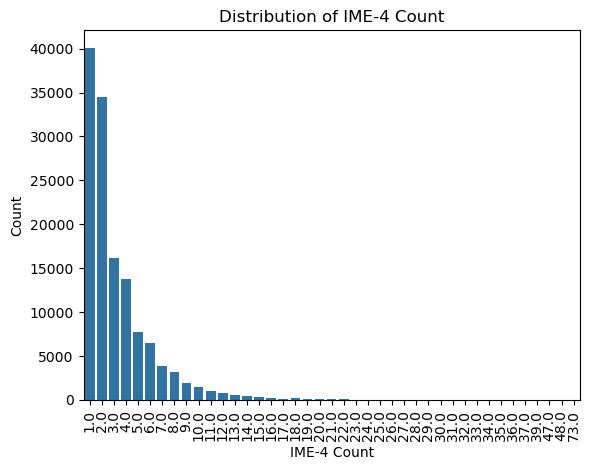

<Axes: ylabel='IME-4 Count'>

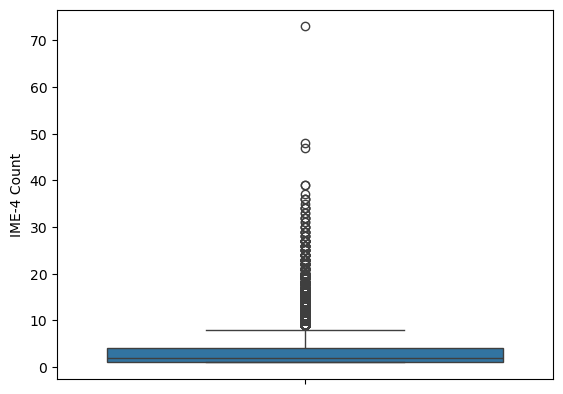

In [ ]:
'IME-4 Count'

sns.countplot(x='IME-4 Count', data=df)
plt.xlabel('IME-4 Count')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.title('Distribution of IME-4 Count')
plt.show()

sns.boxplot(df['IME-4 Count'])

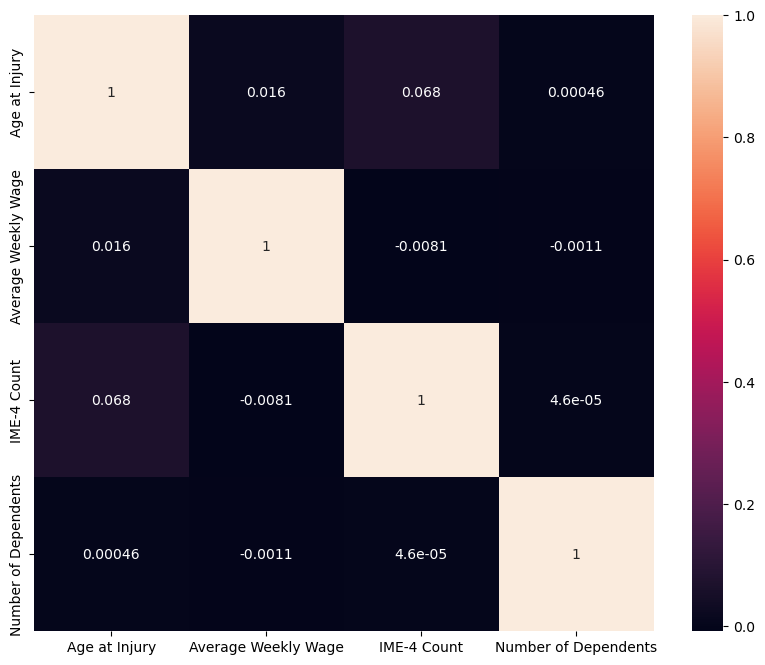

In [ ]:
fig = plt.figure(figsize=(10, 8))


corr = df[num_feat].corr(method="pearson")


sns.heatmap(data=corr, annot=True, )


plt.show()

---

### 2.1.6 Categorical Features- Univariate Analysis

In [ ]:
# select categorical features
df_cat = df.select_dtypes(include='object').columns.tolist()

# add columns that contain 'Code' or 'Description' in their name
df_cat += [col for col in df.columns if 'Code' in col or 'Description' in col]

# remove any duplicates (in case a column is already in both categories)
df_cat = list(set(df_cat))

df_cat

['WCIO Part Of Body Description',
 'WCIO Cause of Injury Description',
 'Zip Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Industry Code',
 'Gender',
 'WCIO Cause of Injury Code',
 'Carrier Name',
 'Medical Fee Region',
 'District Name',
 'Alternative Dispute Resolution',
 'WCB Decision',
 'Carrier Type',
 'WCIO Nature of Injury Description',
 'COVID-19 Indicator',
 'Attorney/Representative',
 'Industry Code Description',
 'County of Injury']

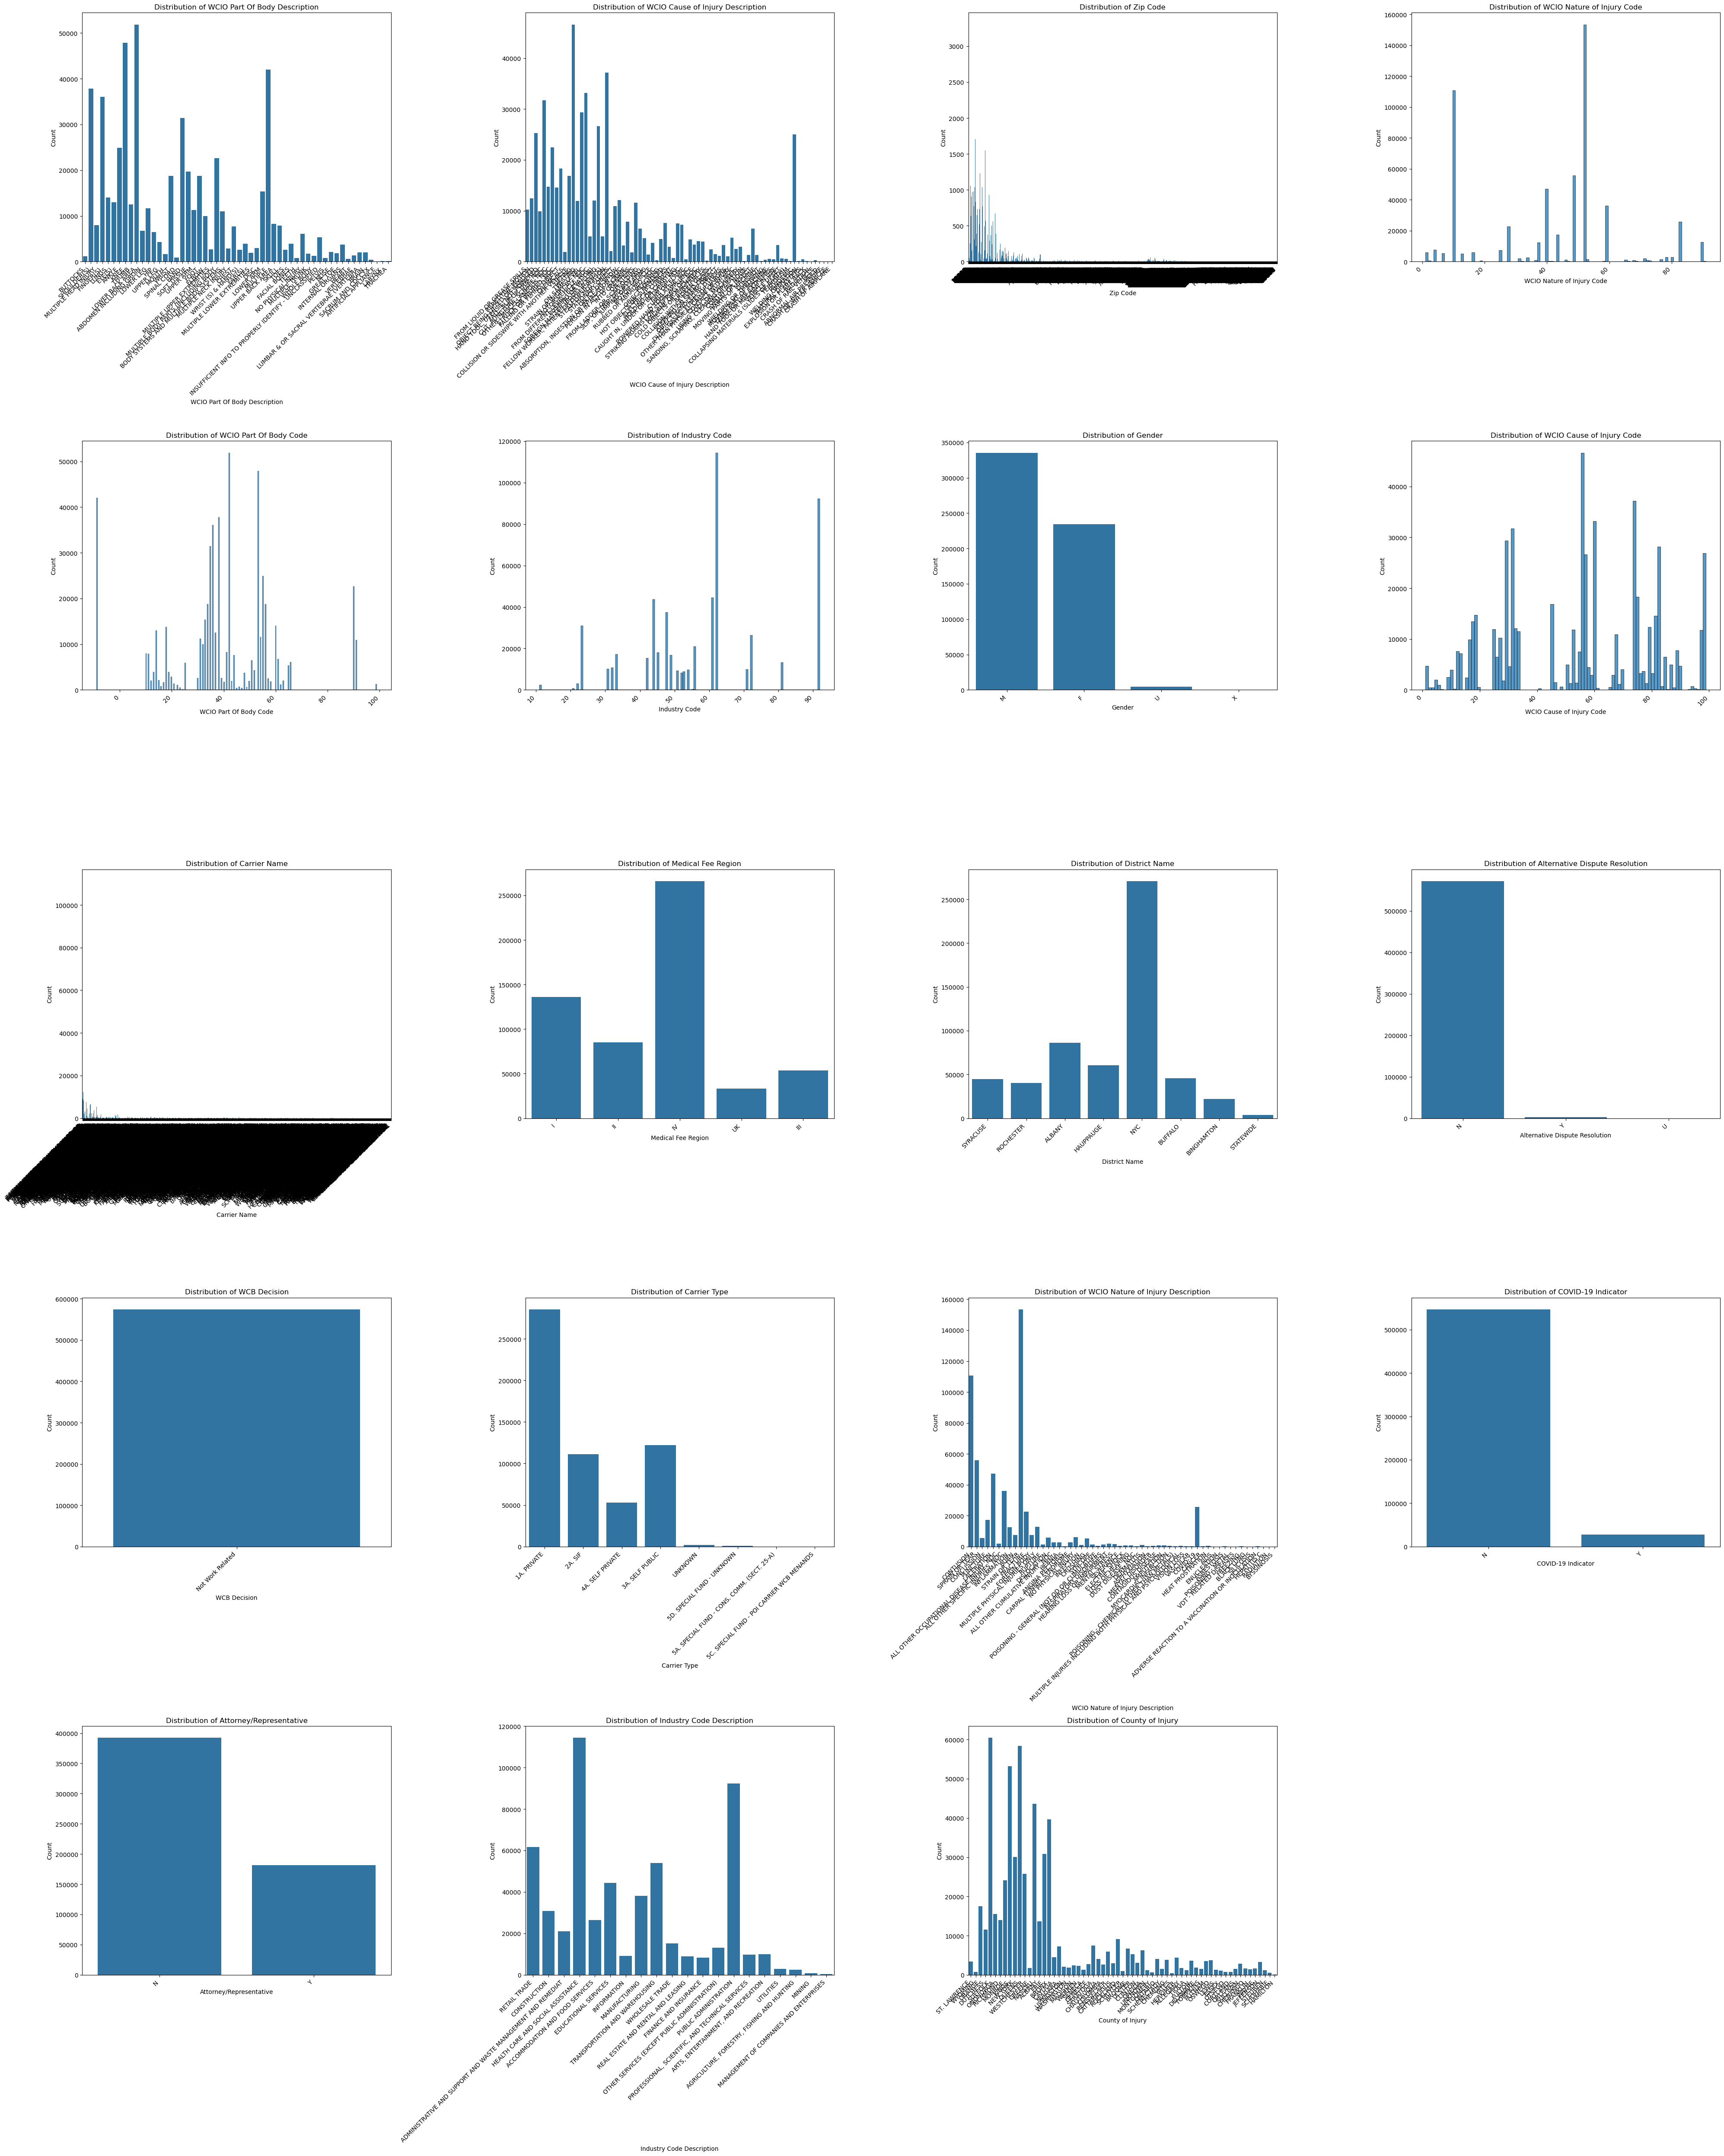

In [ ]:
num_vars = len(df_cat)
num_cols = 4
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

plt.figure(figsize=(40, num_rows * 10))
for idx, var in enumerate(df_cat):
    plt.subplot(num_rows, num_cols, idx + 1)
    if train_data[var].dtype == 'object':
        sns.countplot(x=var, data=train_data)
    else:
        sns.histplot(train_data[var], kde=False)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Assembly Date

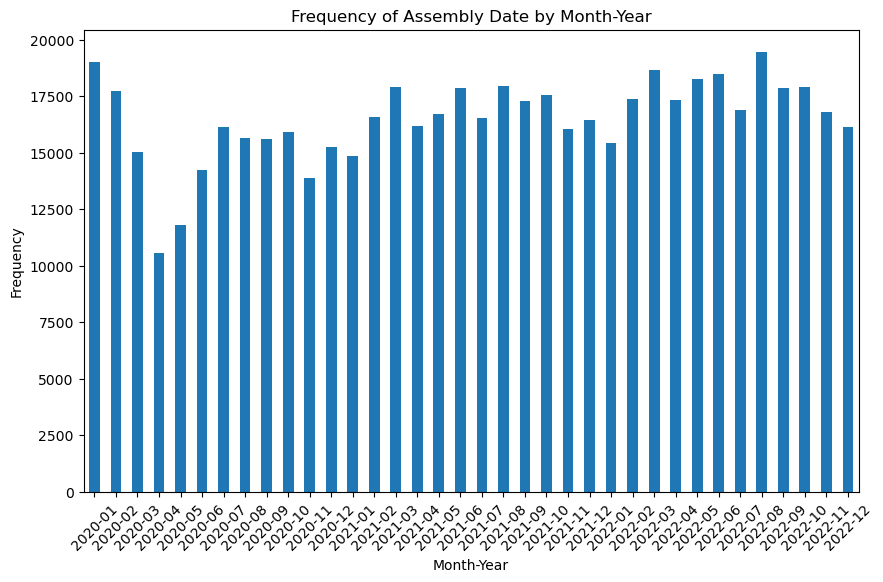

In [ ]:
dfc = df.copy()
dfc['Assembly Date'] = pd.to_datetime(dfc['Assembly Date'])  
dfc['year_month'] = dfc['Assembly Date'].dt.to_period('M')  

dfc['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.title('Frequency of Assembly Date by Month-Year')
plt.xticks(rotation=45)
plt.show()


#### Accident Date

In [ ]:
dfc = df.copy()
dfc['Accident Date'] = pd.to_datetime(dfc['Accident Date'])  

dfc = dfc[dfc['Accident Date'] >= '1961-01-01']

dfc['year'] = dfc['Accident Date'].dt.year
print(dfc['Accident Date'].min(), dfc['Accident Date'].max())

1961-09-06 00:00:00 2023-09-29 00:00:00


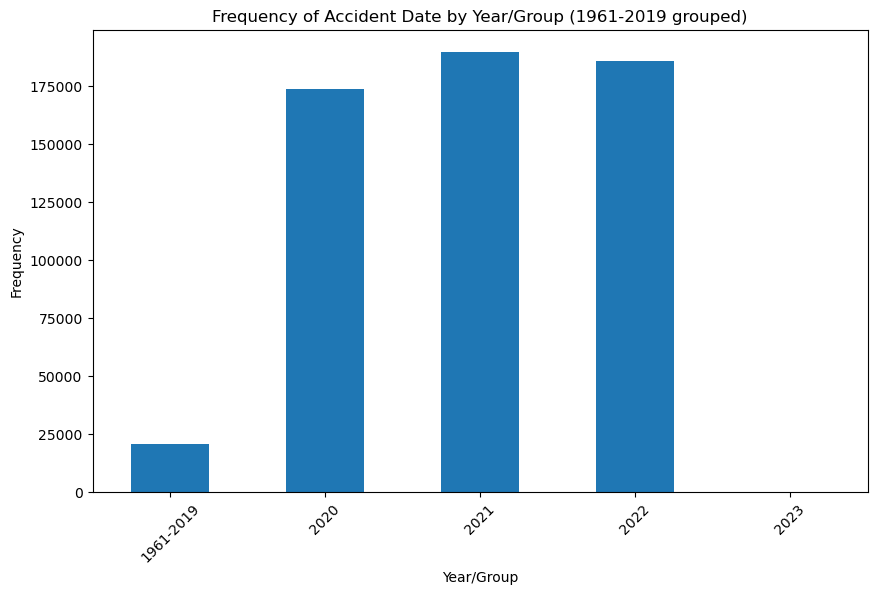

In [ ]:
# consider only dates from 1961 onwards (because of the min value on the cell above)
dfc = dfc[dfc['Accident Date'] >= '1961-01-01']

# create a group for the first 59 year due to the low frequency
dfc['year_group'] = dfc['year'].apply(lambda x: '1961-2019' if x <= 2019 else str(x))

# count the frequency of the accident date by year
yearly_grouped_counts = dfc['year_group'].value_counts().sort_index()

# plot the frequency of the accident date by year
yearly_grouped_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year/Group')
plt.ylabel('Frequency')
plt.title('Frequency of Accident Date by Year/Group (1961-2019 grouped)')
plt.xticks(rotation=45)
plt.show()

#### C-2 and C-3 Date

In [ ]:
dfc = df.copy()
dfc['C-2 Date'] = pd.to_datetime(dfc['C-2 Date'])  


dfc['year'] = dfc['C-2 Date'].dt.year
print(dfc['C-2 Date'].min(), dfc['C-2 Date'].max())

1996-01-12 00:00:00 2024-06-01 00:00:00


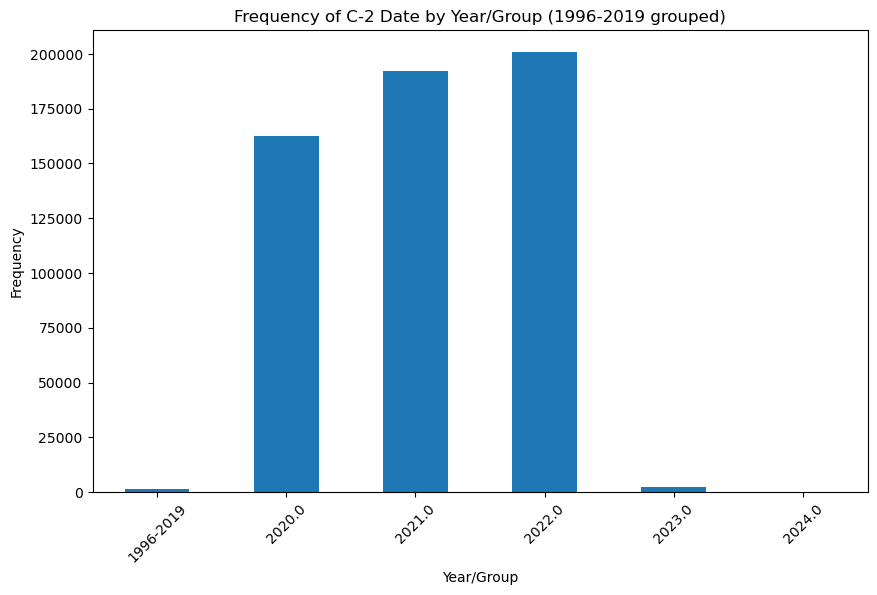

In [ ]:
# consider only dates from 1996 onwards (because of the min value on the cell above)
dfc = dfc[dfc['C-2 Date'] >= '1996-01-1']

# create a group for the first 2ish decades due to the low frequency
dfc['year_group'] = dfc['year'].apply(lambda x: '1996-2019' if x <= 2019 else str(x))

# count the frequency of the accident date by year
yearly_grouped_counts = dfc['year_group'].value_counts().sort_index()

# plot the frequency of the accident date by year
yearly_grouped_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year/Group')
plt.ylabel('Frequency')
plt.title('Frequency of C-2 Date by Year/Group (1996-2019 grouped)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dfc = df.copy()

# Convert 'C-2 Date' and 'C-3 Date' to datetime
dfc['C-2 Date'] = pd.to_datetime(dfc['C-2 Date'])
dfc['C-3 Date'] = pd.to_datetime(dfc['C-3 Date'])

print(dfc['C-2 Date'].min(), dfc['C-2 Date'].max())
print(dfc['C-3 Date'].min(), dfc['C-3 Date'].max())


1996-01-12 00:00:00 2024-06-01 00:00:00
1992-11-13 00:00:00 2024-05-31 00:00:00


In [ ]:
# consider only dates from 1996 onwards (because of the min value on the cell above) for C-2
dfc_c2 = dfc[dfc['C-2 Date'] >= '1996-01-01']
dfc_c2['year_c2'] = dfc_c2['C-2 Date'].dt.year

# consider only dates from 1992 onwards (because of the min value on the cell above) for C-3
dfc_c3 = dfc[dfc['C-3 Date'] >= '1992-01-01']
dfc_c3['year_c3'] = dfc_c3['C-3 Date'].dt.year


# group from the min year to 2019 and then by year due to the low frequency
dfc_c2['year_group_c2'] = dfc_c2['year_c2'].apply(lambda x: '1996-2019' if x <= 2019 else str(x))
dfc_c3['year_group_c3'] = dfc_c3['year_c3'].apply(lambda x: '1992-2019' if x <= 2019 else str(x))

# Calculate the frequency of the accident date by year group
yearly_grouped_counts_c2 = dfc_c2['year_group_c2'].value_counts().sort_index()
yearly_grouped_counts_c3 = dfc_c3['year_group_c3'].value_counts().sort_index()

C:\Users\timst\AppData\Local\Temp\ipykernel_30392\4135501934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_c2['year_c2'] = dfc_c2['C-2 Date'].dt.year
C:\Users\timst\AppData\Local\Temp\ipykernel_30392\4135501934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_c3['year_c3'] = dfc_c3['C-3 Date'].dt.year
C:\Users\timst\AppData\Local\Temp\ipykernel_30392\4135501934.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

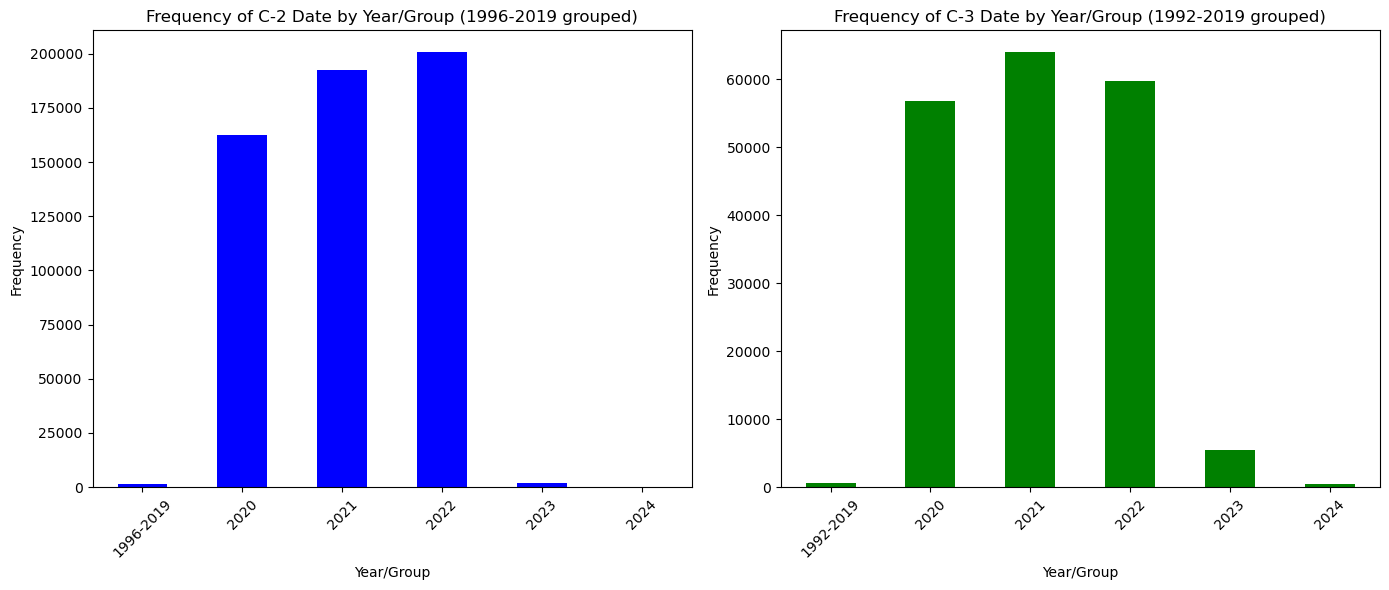

In [ ]:
# Plot both graphs side by side using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# plot for C-2 Date
yearly_grouped_counts_c2.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_xlabel('Year/Group')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of C-2 Date by Year/Group (1996-2019 grouped)')
axes[0].tick_params(axis='x', rotation=45)

# plot for C-3 Date
yearly_grouped_counts_c3.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_xlabel('Year/Group')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of C-3 Date by Year/Group (1992-2019 grouped)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### First Hearing Date

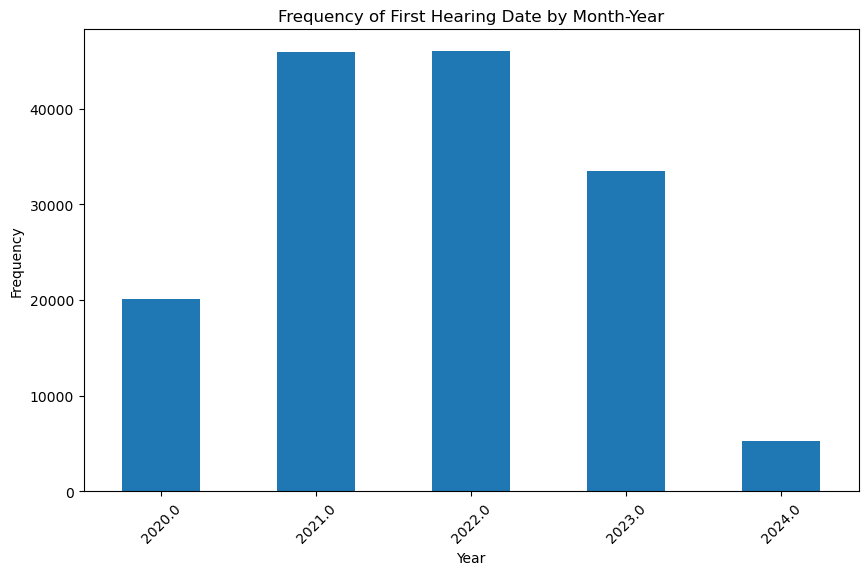

In [ ]:
dfc = df.copy()
dfc['First Hearing Date'] = pd.to_datetime(dfc['First Hearing Date'])  
dfc['year'] = dfc['First Hearing Date'].dt.year

dfc['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of First Hearing Date by Month-Year')
plt.xticks(rotation=45)
plt.show()

#### WCB Decision
Oh no, this categorical feature only has one value

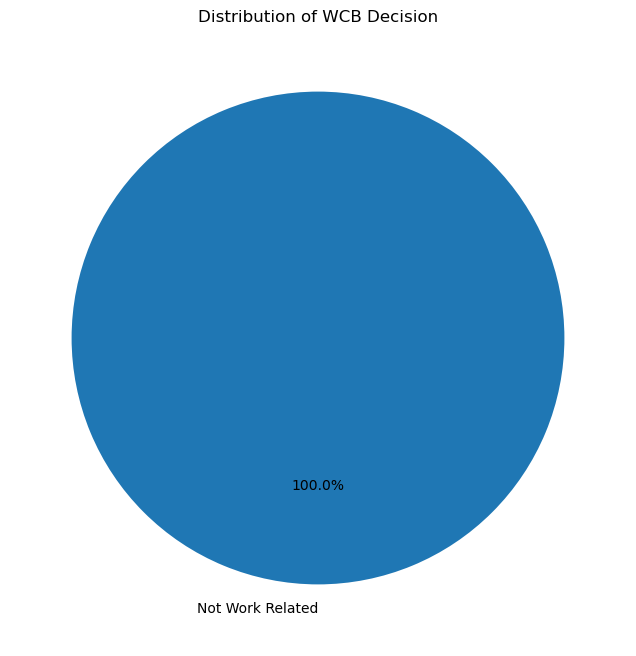

In [ ]:
wcb_decision_counts = df['WCB Decision'].value_counts()

plt.figure(figsize=(8, 8))
wcb_decision_counts.plot.pie(autopct='%1.1f%%', startangle=90,)
plt.ylabel('')
plt.title('Distribution of WCB Decision')
plt.show()

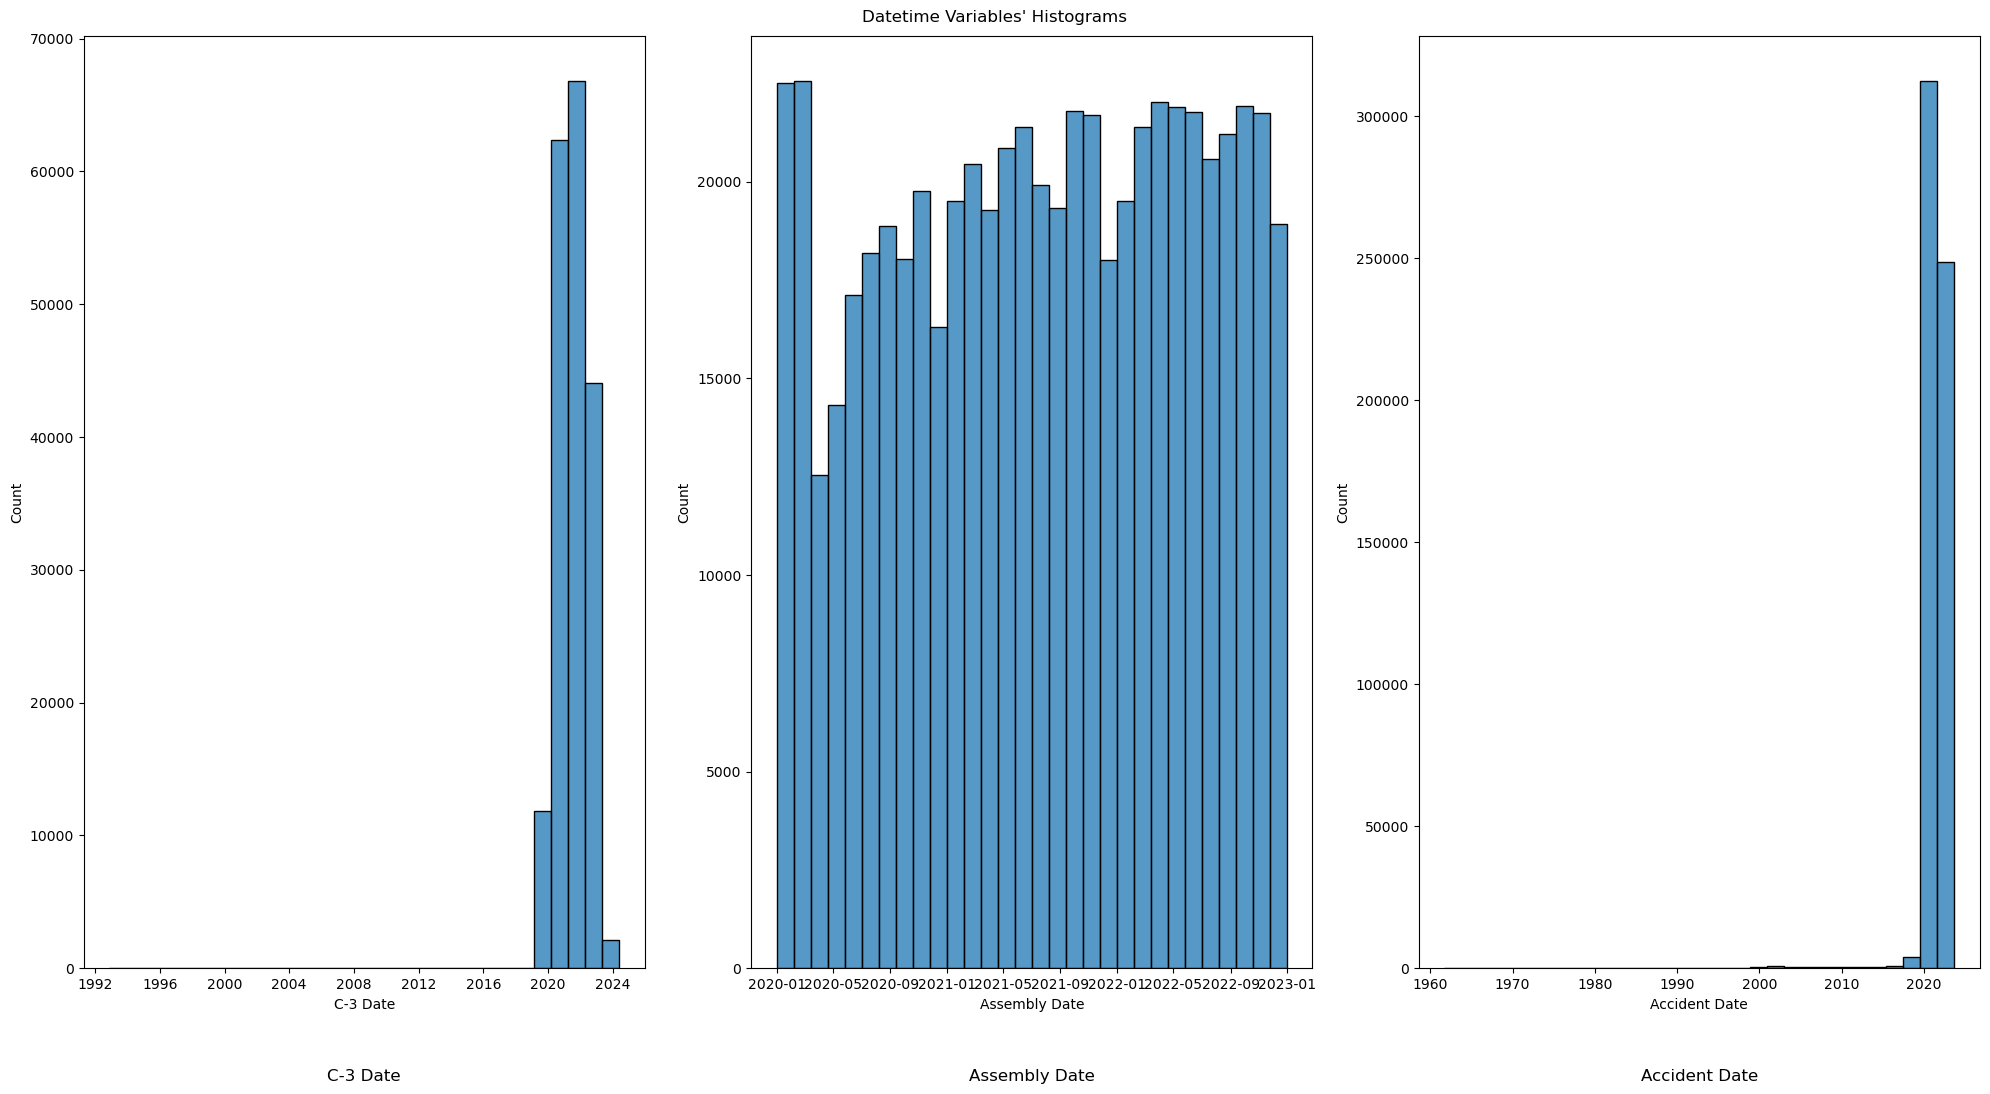

In [ ]:
features = ['C-3 Date', 'Assembly Date', 'Accident Date']

# Set up the figure with the specified number of rows and columns
sp_rows = 1
sp_cols = 3

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Plot data
for ax, feat in zip(axes.flatten(), features):
    sns.histplot(df[feat], ax=ax, bins=30)
    ax.set_title(feat, y=-0.13)

title = "Datetime Variables' Histograms"

plt.suptitle(title)
plt.show()